In [7]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import sympy as sm

def inner(x1: sm.Matrix,x2: sm.Matrix):
    '''
    Computes the inner product of two vectors of same length.
    '''

    return x1.dot(x2, conjugate_convention = 'right')

sm.MutableDenseMatrix.inner = inner
sm.ImmutableDenseMatrix.inner = inner

In [67]:


def solar_panel_projection(θ_s, ϕ_s, θ_p, ϕ_p):
    results = np.empty([len(θ_s)])
    for i in range(0,len(θ_s)):
        us = sm.Matrix([-np.sin(θ_s[i]) * np.cos(ϕ_s[i]),-np.sin(θ_s[i]) * np.sin(ϕ_s[i]), -np.cos(θ_s[i])])
        up = sm.Matrix([-1*np.sin(θ_p[i]) * np.cos(ϕ_p[i]), -np.sin(ϕ_p[i])*np.sin(θ_p[i]), -np.cos(θ_p[i])])
    
        inprod = (inner(us,up))
        simpinprod = inprod.simplify()
        if(simpinprod < 0):
            results = np.append(0.0,results)
        else:
            results = np.append(simpinprod, results)
    return results

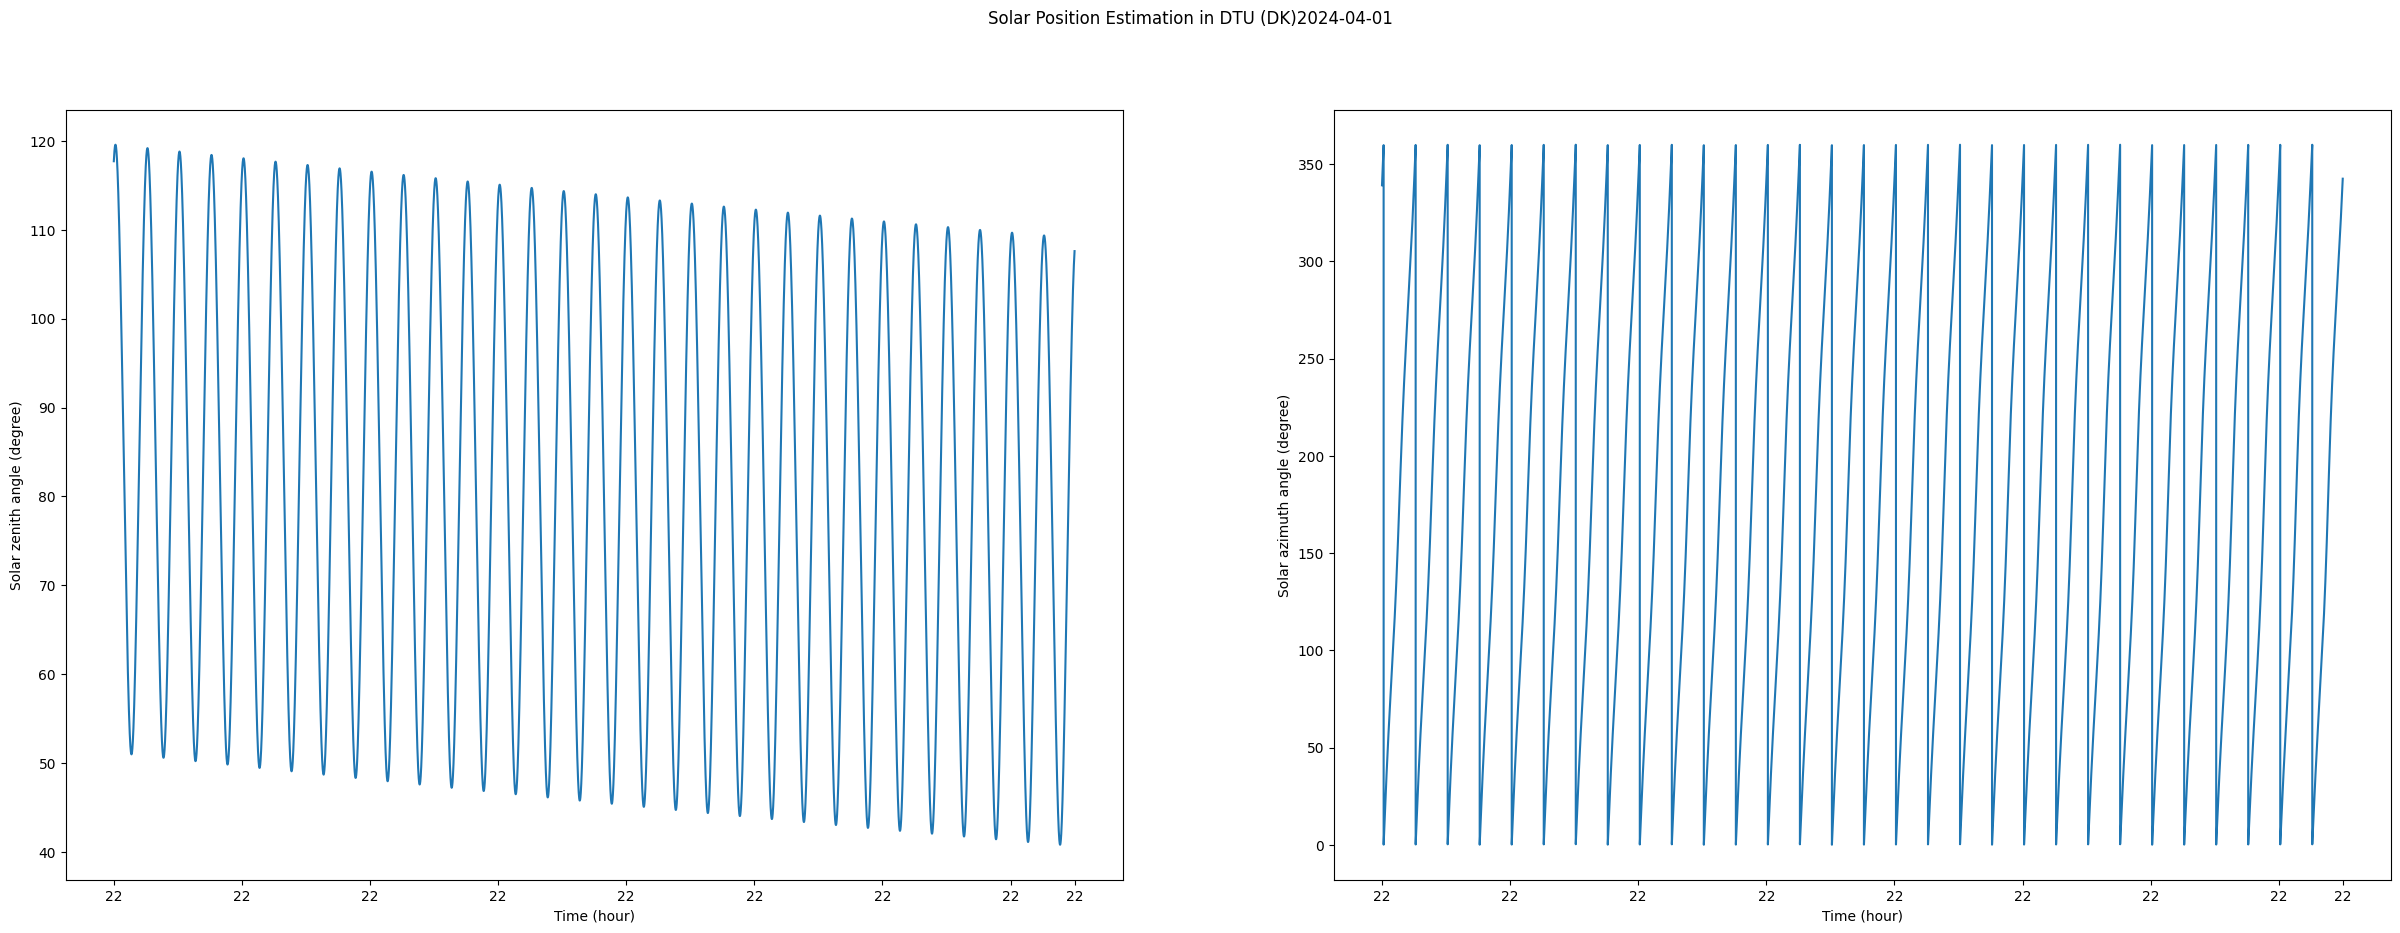

In [62]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import sympy as sm

tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

valgt_dato = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[start_dato:slut_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[start_dato:slut_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
valgt_dato = "2024-04-20"
zenithangs = np.array(solpos.loc[start_dato:slut_dato].zenith)
elevangs = np.array(solpos.loc[start_dato:slut_dato].elevation)
azimuthangs = np.array(solpos.loc[start_dato:slut_dato].azimuth)

In [63]:
valgt_dato = "2024-04-20"
zenithangs = np.array(solpos.loc[start_dato:slut_dato].zenith)
elevangs = np.array(solpos.loc[start_dato:slut_dato].elevation)
azimuthangs = np.array(solpos.loc[start_dato:slut_dato].azimuth)

In [97]:

def fluxMinuteEntireDay(day, theta_p, phi_p):
    S0=1100
    L = 175.5
    B = 103.8

    zenithangs = np.deg2rad(np.array(solpos.loc[day].apparent_zenith))
    azimuthangs = np.deg2rad(np.array(solpos.loc[day].azimuth))
    invalidList = []
    for q in range(len(zenithangs)):
        if np.deg2rad(zenithangs[q])<0 or np.deg2rad(zenithangs[q])>(np.pi/2):
            invalidList.append(q)
    
    p_t = np.full(len(zenithangs),theta_p)
    p_p = np.full(len(zenithangs),phi_p)


 
    projList =  solar_panel_projection(zenithangs,azimuthangs,p_t,p_p)
    
    for index in invalidList:
        projList[index]=0
    for i in projList:
        i = i*S0*L*B
    
    return projList


In [99]:
zenithangs = np.array(solpos.loc[start_dato:slut_dato].zenith)
azimuthangs = np.array(solpos.loc[start_dato:slut_dato].azimuth)
fluxting =(fluxMinuteEntireDay(valgt_dato, 45,180))
for i in fluxting:
        print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.000719406838405393
0.00494008704913360
0.00916125936018151
0.0133828462229178
0.0176047672271727
0.0218269419640937
0.0260492900198548
0.0302717309691636
0.0344941844084369
0.0387165699101806
0.0429388070556292
0.0471608154288571
0.0513825174411673
0.0556038270400951
0.0598246666500697
0.0640449558811603
0.0682646143536422
0.0724835616914622
0.0767017175559677
0.0809190015996371
0.0851353334991112
0.0893506329493199
0.0935648196565814
0.0977778133715253
0.101989536668321
0.106199903679645
0.110408837038058
0.114616256570134
0.118822082154631
0.123026233677